In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

In [3]:
data = pd.read_csv('Google_train_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
data['Close'] = pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [8]:
X_train = []
y_train = []
for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [15]:
model = Sequential()
print(f'Model : {model}')

model.add(LSTM(units=100,return_sequences=True,input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss="mean_squared_error") 


Model : <Sequential name=sequential_4, built=False>


c:\Users\Nimesh Jethva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
hist = model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
35/35 - 8s - 231ms/step - loss: 0.0297
Epoch 2/20
35/35 - 2s - 71ms/step - loss: 0.0105
Epoch 3/20
35/35 - 2s - 70ms/step - loss: 0.0094
Epoch 4/20
35/35 - 2s - 68ms/step - loss: 0.0076
Epoch 5/20
35/35 - 2s - 70ms/step - loss: 0.0072
Epoch 6/20
35/35 - 3s - 72ms/step - loss: 0.0074
Epoch 7/20
35/35 - 2s - 70ms/step - loss: 0.0077
Epoch 8/20
35/35 - 2s - 71ms/step - loss: 0.0064
Epoch 9/20
35/35 - 2s - 70ms/step - loss: 0.0067
Epoch 10/20
35/35 - 3s - 77ms/step - loss: 0.0075
Epoch 11/20
35/35 - 3s - 85ms/step - loss: 0.0064
Epoch 12/20
35/35 - 3s - 98ms/step - loss: 0.0054
Epoch 13/20
35/35 - 3s - 96ms/step - loss: 0.0066
Epoch 14/20
35/35 - 3s - 96ms/step - loss: 0.0062
Epoch 15/20
35/35 - 4s - 107ms/step - loss: 0.0049
Epoch 16/20
35/35 - 3s - 95ms/step - loss: 0.0051
Epoch 17/20
35/35 - 3s - 78ms/step - loss: 0.0046
Epoch 18/20
35/35 - 3s - 95ms/step - loss: 0.0054
Epoch 19/20
35/35 - 3s - 95ms/step - loss: 0.0048
Epoch 20/20
35/35 - 3s - 89ms/step - loss: 0.0042


<function matplotlib.pyplot.show(close=None, block=None)>

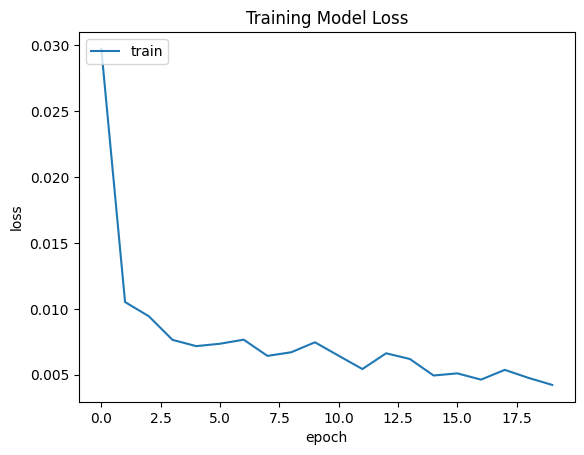

In [17]:
plt.plot(hist.history['loss'])
plt.title('Training Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show

In [21]:
# For Test Data
testData = pd.read_csv('Google_test_data.csv')
testData["Close"] = pd.to_numeric(testData.Close, errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values

#input array to the model
inputClosing = testData.iloc[:,0:].values
inputClosingScale = sc.transform(inputClosing)
inputClosingScale.shape

X_test = []
length = len(testData)
timestep = 60

for i in range(timestep,length):
    X_test.append(inputClosingScale[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [22]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [23]:
predicted_price = sc.inverse_transform(y_pred)

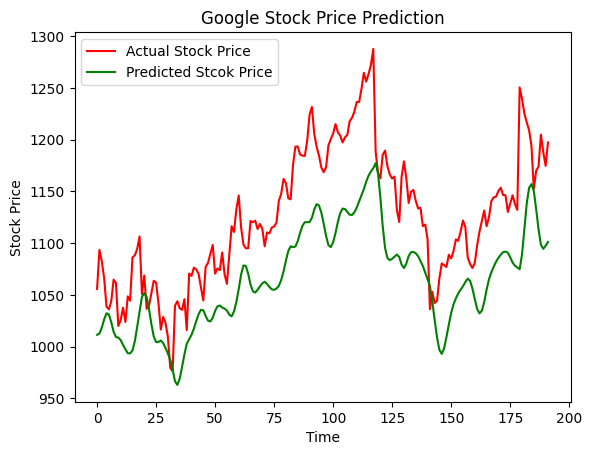

In [25]:
# Visualization
plt.plot(y_test, color = "red", label = "Actual Stock Price")
plt.plot(predicted_price, color = "green", label = "Predicted Stcok Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()